In [1]:
#get SNODAS get_snodas(dt = , outdir=None, code=1036) 
#SNODAS Codes: 1036= snow depth

In [ ]:
import rasterio

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature  
from matplotlib import pyplot
#import rasterstats
import regionmask
import xarray as xr
#import xesmf as xe
import numpy as np
import pandas as pd
from datetime import datetime

In [7]:
ds_test = xr.open_dataset('/Users/carina/Desktop/data/seup/SNODAS/SNODAS_20170914.nc') 

#mask_OSSE = xr.open_dataset('/Users/carina/Desktop/code/SEUP/mask_OSSE.nc')

#mask_OSSE_arr = mask_OSSE.to_array()

#masked_ds = ds_test.where(mask_OSSE_arr == 0)

In [6]:
US2 = np.array([[-108.565, 40.715], [-105.025, 40.715], [-105.025, 37.525], [-108.565, 37.525]])
names = ["osse_region"]
abbrevs = ["osse"]

osse_region = regionmask.Regions([US2], names=names, abbrevs=abbrevs, name="osse")
osse_region

1 'osse' Regions
osse

In [10]:
mask_OSSE_test = osse_region.mask(ds_test)

In [30]:
#mask_OSSE_test.plot()

In [31]:
#type(mask_OSSE_test)

In [32]:
#masked_ds = ds_test.where(mask_OSSE_test == 0)

In [33]:
#masked_ds

In [34]:
sel_mask = mask_OSSE_test.where(mask_OSSE_test == 0).values #np array
lat = mask_OSSE_test.lat.values
lon = mask_OSSE_test.lon.values
id_lon = lon[np.where(~np.all(np.isnan(sel_mask), axis=0))]
id_lat = lat[np.where(~np.all(np.isnan(sel_mask), axis=1))]
out_sel = ds_test.sel(lat = slice(id_lat[0], id_lat[-1]), lon = slice(id_lon[0], 
                                                                    id_lon[-1])).compute().where(mask_OSSE_test == 0)

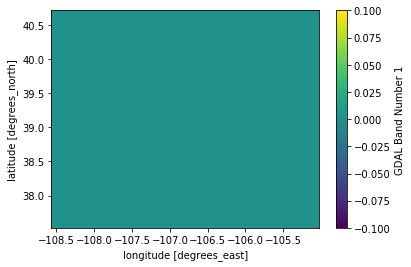

In [29]:
out_sel.Band1.plot()